In [1]:
%pip install nbformat 
%pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as mm
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel (r'C:\Users\jwiggins\Downloads\January 2017 Crude Diet Yields and Product Stream Quality.xlsx',None)
sheets=pd.DataFrame(df.keys())
sheets_lower_underscore=sheets.applymap(lambda x: x.lower().replace(' ','_'))
sheets_lower_underscore

,0
0,vps2_crude_diet
1,vps2_yields
2,vps2_strmq
3,vps4_crude_diet
4,vps4_yields
5,vps4_strmq
6,vps5_crude_diet
7,vps5_yields
8,vps5_strmq


In [4]:
import pandas as pd

vps5_crude_diet = pd.read_excel (r'C:\Users\jwiggins\Downloads\January 2017 Crude Diet Yields and Product Stream Quality.xlsx',sheet_name='VPS5 Crude Diet', header=[5]).iloc[1:,:]
vps5_yields = pd.read_excel (r'C:\Users\jwiggins\Downloads\January 2017 Crude Diet Yields and Product Stream Quality.xlsx',sheet_name='VPS5 Yields', header=[5]).iloc[1:,:]
vps5_strmq = pd.read_excel (r'C:\Users\jwiggins\Downloads\January 2017 Crude Diet Yields and Product Stream Quality.xlsx',sheet_name='VPS5 StrmQ', header=[6]).iloc[1:,:]

all_data=pd.concat([vps5_crude_diet,vps5_yields,vps5_strmq],axis=1)

In [5]:
all_data.dtypes

Date        object
FP5FAPI    float64
FP5FSUL    float64
FP5FNIT    float64
FP5FV40    float64
            ...   
MNI        float64
MVA        float64
CON.4      float64
V50        float64
TAN.2      float64
Length: 148, dtype: object

In [6]:
def data_feed(csv):
    dropped_date = csv.select_dtypes(exclude=['datetime','object']).fillna(value=0).iloc[:30]
    data_input_scaled=ss().fit_transform(dropped_date)
    (x_train,x_test) = train_test_split(data_input_scaled,test_size=0.2,random_state=42)
    return x_train,x_test

In [7]:
dropped_date = all_data.select_dtypes(exclude=['datetime','object']).fillna(value=0).iloc[:30]
dropped_date.iloc[:,44]

1     46.95337
2     46.10221
3     45.25808
4     43.37233
5     42.75089
6     42.46489
7     42.46671
8     42.48187
9     42.59678
10    42.94429
11    44.77888
12    45.75213
13    47.44917
14    44.66205
15    47.21509
16    46.84366
17    45.98304
18    46.78707
19    45.82042
20    45.40730
21    44.85041
22    43.34655
23    45.18253
24    45.79591
25    43.49060
26    42.31048
27    51.02158
28    48.08022
29    43.70700
30    44.48642
Name: CT2.1, dtype: float64

In [8]:
def cnn_model(data_input):
    info=data_feed(data_input)
    model = tf.keras.models.Sequential()

    # model.build(input_shape=(info[0].shape[1]))
    # First hidden layer
    #  YOUR CODE GOES HERE
    # model.add(tf.keras.layers.Conv1D(12,3,activation="relu",padding='same',input_shape=(info[0].shape[1],1)))
    # model.add(tf.keras.layers.MaxPool1D(pool_size=2,data_format='channels_last',padding='same'))
    # # # model.add(tf.keras.layers.Dropout(0.1))
    # model.add(tf.keras.layers.Conv1D(32,3,activation="relu",padding='same'))
    # model.add(tf.keras.layers.MaxPool1D(pool_size=2,data_format='channels_last',padding='same'))
    # # model.add(tf.keras.layers.Dropout(0.1))
    # model.add(tf.keras.layers.Conv1D(64,5,activation="relu",padding='same'))
    # model.add(tf.keras.layers.MaxPool1D(pool_size=2,data_format='channels_last',padding='same'))
    # model.add(tf.keras.layers.Conv1D(64,5,activation="relu",padding='same'))
    # model.add(tf.keras.layers.UpSampling1D(2))
    # # nn_model.add(tf.keras.layers.Dropout(0.1))
    # model.add(tf.keras.layers.Conv1D(32,3,activation="relu",padding='same'))
    # model.add(tf.keras.layers.UpSampling1D(2))
    # # nn_model.add(tf.keras.layers.Dropout(0.1))
    # model.add(tf.keras.layers.Conv1D(12,3,activation="relu",padding='same'))
    # model.add(tf.keras.layers.UpSampling1D(2))


    model.add(tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation='relu', input_shape=(info[0].shape[1],1)))
    model.add(tf.keras.layers.MaxPool1D(pool_size=2))
    model.add(tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.MaxPool1D(pool_size=2))
    # model.add(tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation='relu'))
    # model.add(tf.keras.layers.MaxPool1D(pool_size=2))
    # model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=16, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=4, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=1, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=4, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=16, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=64, activation='relu'))




    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=50, activation='relu'))

    model.add(tf.keras.layers.Dense(units=info[0].shape[1], activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae','accuracy'])
    es = tf.keras.callbacks.EarlyStopping(monitor='val_mse',patience=30,verbose=1,mode='min')
    # checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath ="/content/sample_data")
    tbCallBack = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)
    cb_list = [es,tbCallBack]
    model.fit(info[0], info[0], epochs=10000,validation_split=.05,shuffle=False,callbacks=cb_list)
    model.evaluate(info[0], info[0])
    return model


In [9]:
m=cnn_model(all_data)

m.summary()

Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 1.0389 - mse: 1.0389 - mae: 0.7280 - accuracy: 0.0000e+00 - val_loss: 0.8054 - val_mse: 0.8054 - val_mae: 0.6477 - val_accuracy: 0.0000e+00
Epoch 2/10000
1/1 [==============================] - 0s 178ms/step - loss: 1.0216 - mse: 1.0216 - mae: 0.7209 - accuracy: 0.0000e+00 - val_loss: 0.7990 - val_mse: 0.7990 - val_mae: 0.6453 - val_accuracy: 0.0000e+00
Epoch 3/10000
1/1 [==============================] - 0s 119ms/step - loss: 1.0066 - mse: 1.0066 - mae: 0.7147 - accuracy: 0.0000e+00 - val_loss: 0.7941 - val_mse: 0.7941 - val_mae: 0.6432 - val_accuracy: 0.0000e+00
Epoch 4/10000
1/1 [==============================] - 0s 146ms/step - loss: 0.9933 - mse: 0.9933 - mae: 0.7094 - accuracy: 0.0000e+00 - val_loss: 0.7901 - val_mse: 0.7901 - val_mae: 0.6413 - val_accuracy: 0.0000e+00
Epoch 5/10000
1/1 [==============================] - 0s 126ms/step - loss: 0.9813 - mse: 0.9813 - mae: 0.7046 - accuracy: 0.0000e+00 - val_loss

In [18]:
m.save("crude_sim_nn")

INFO:tensorflow:Assets written to: crude_sim_nn\assets


In [22]:
def prediction_model(X):
  reconstructed_model = tf.keras.models.load_model("crude_sim_nn")
  prediction_result=pd.DataFrame(reconstructed_model.predict(X))
  
  return prediction_result

In [31]:
def data_input(csv_path):


    vps5_crude_diet = pd.read_excel (csv_path,sheet_name='VPS5 Crude Diet', header=[5]).iloc[1:,:]
    vps5_yields = pd.read_excel (csv_path,sheet_name='VPS5 Yields', header=[5]).iloc[1:,:]
    vps5_strmq = pd.read_excel (csv_path,sheet_name='VPS5 StrmQ', header=[6]).iloc[1:,:]

    all_data=pd.concat([vps5_crude_diet,vps5_yields,vps5_strmq],axis=1)

    dropped_date = all_data.select_dtypes(exclude=['datetime','object']).fillna(value=0)
    data_input_scaled=ss().fit_transform(dropped_date)
    return data_input_scaled

In [32]:
def prediction_model(X):
  
  reconstructed_model = tf.keras.models.load_model("crude_sim_nn")
  prediction_result=pd.DataFrame(reconstructed_model.predict(data_input(X)))
  
  return prediction_result

In [33]:
prediction_model(r'C:\Users\jwiggins\Downloads\January 2017 Crude Diet Yields and Product Stream Quality.xlsx')

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.575721,-0.104336,-0.684419,-1.071778,-0.617436,2.017224,-0.040545,0.891274,0.425228,-0.094400,...,-0.644781,-0.600418,0.489013,0.699585,0.075070,-0.272218,-0.132629,0.133027,0.011857,-0.416966
1,0.531356,0.140145,-0.819020,-1.079499,-0.898375,1.109622,-0.031236,0.659525,0.512435,-0.046112,...,-0.354420,-0.303357,0.626950,0.615986,0.037474,-0.029173,0.079461,0.268934,0.190625,-0.187105
2,0.332922,0.044558,-0.581925,-0.591965,-0.456502,-0.392860,-0.048658,0.459251,0.395814,0.007565,...,-0.372770,-0.302611,0.396370,0.561868,-0.056288,-0.130154,-0.195384,0.100722,0.170258,-0.056818
3,-0.520800,0.718286,-0.127160,-0.699290,-0.490260,-0.840219,-0.116812,0.658953,0.043110,-0.011004,...,0.563326,0.490983,0.457408,0.073905,0.744148,0.860598,1.101642,0.782115,0.420057,0.044911
4,-1.076406,0.467045,0.532694,-0.292871,0.168179,-0.464565,-0.203340,0.373913,0.012764,0.011711,...,0.694620,0.983955,0.514046,-0.079550,0.846669,1.187232,1.261395,0.770694,0.382988,0.399606
5,-1.384128,0.617680,0.899731,0.207943,0.483372,0.244553,-0.187177,0.074476,-0.080851,0.072747,...,0.761040,1.316476,0.539685,-0.206343,1.025373,1.554059,1.555913,0.786355,0.513959,0.547093
6,-1.540389,0.476499,0.888955,0.257677,0.448851,0.654546,-0.339918,-0.485742,-0.549760,0.031015,...,0.625409,1.327411,0.520451,-0.244777,0.947262,1.674051,1.695528,0.773149,0.465453,0.618377
7,-1.355970,0.331734,1.120387,0.652520,0.687650,-0.741965,-0.330017,-0.529608,-0.699479,-0.074863,...,0.244611,1.296866,0.439550,-0.292126,0.893051,1.266206,1.262229,0.708797,0.392119,0.832626
8,-1.276794,0.512389,1.311253,1.516357,1.247269,-0.415791,-0.120431,-1.130927,-0.316442,0.017689,...,-0.153731,1.014055,0.476865,0.057138,0.802706,0.896175,0.798347,0.467244,0.451170,0.764553
9,-1.049790,0.441143,1.219984,1.621866,1.210014,-0.433827,-0.085068,-0.972993,-0.095652,0.031128,...,-0.379817,0.975201,0.477737,0.186294,0.663236,0.776040,0.555845,0.406097,0.454729,0.876909


In [10]:
import matplotlib.pyplot as plt
data_mod=data_feed(all_data)
reconstructions = m.predict(data_mod[0])
train_loss = tf.keras.losses.mae(reconstructions, data_mod[0])

import plotly.express as px
import numpy as np
df_loss = pd.DataFrame(train_loss)
x=range(0,len(df_loss))
y=df_loss.iloc[:,0]
fig = px.line(x=x,y=y)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

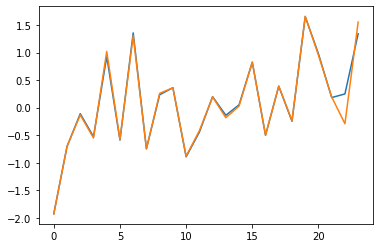

In [11]:
x=list(range(0,len(pd.DataFrame(data_mod[0]).iloc[:,1])))
y=pd.DataFrame(reconstructions).iloc[:,2]
x1=list(range(0,len(pd.DataFrame(data_mod[0]).iloc[:,1])))
y1=pd.DataFrame(data_mod[0]).iloc[:,2]
plt.plot(x,y)
plt.plot(x1,y1)
# plt.plot(x1,y1)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

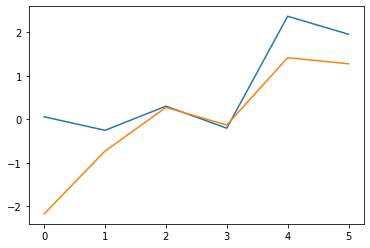

In [12]:
reconstructions_test = m.predict(data_mod[1])
x=list(range(0,len(pd.DataFrame(data_mod[1]).iloc[:,0])))
y=pd.DataFrame(reconstructions_test).iloc[:,4]
x1=list(range(0,len(pd.DataFrame(data_mod[1]).iloc[:,1])))
y1=pd.DataFrame(data_mod[1]).iloc[:,4]
plt.plot(x,y)
plt.plot(x1,y1)
# plt.plot(x1,y1)
plt.show

In [13]:
px.scatter_matrix(pd.DataFrame(data_mod[0]).iloc[:,:10])

In [194]:
import shap

explainer = shap.KernelExplainer(m.predict, data_mod[0])
shap_values = explainer.shap_values(data_mod[0])


  0%|          | 0/24 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC()

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


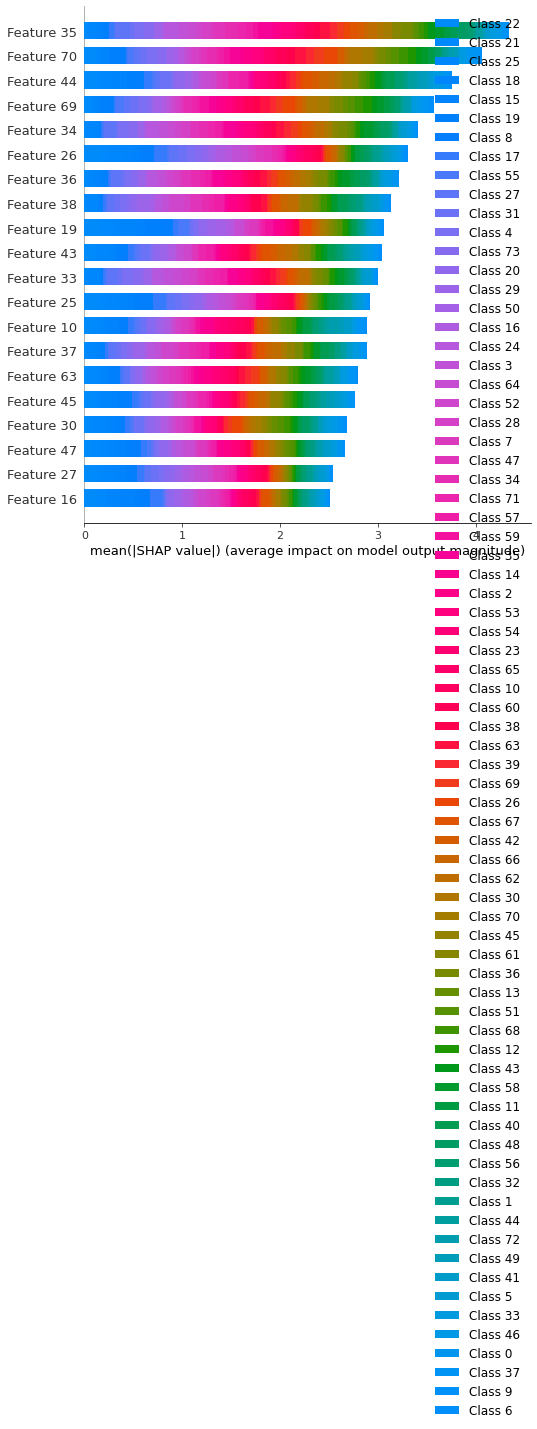

In [195]:
shap.summary_plot(shap_values, data_mod[0])


<AxesSubplot:>

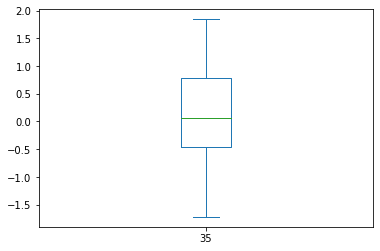

In [202]:
pd.DataFrame(data_mod[0]).iloc[:,35].plot(kind='box')